# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [283]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [284]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [285]:
# Load dataset

df = pd.read_csv("/content/drive/MyDrive/Project SUbmission 2 - BMLP/bank_transactions_data_2.csv")
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [286]:
#Struktur data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [287]:
# Missing value

df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [288]:
# Duplicates data
df.duplicated().sum()

np.int64(0)

In [289]:
# Hitung deskriptif statistik untuk variabel numerik
descriptive_stats = df.describe()

# Tampilkan hasil
print(descriptive_stats)

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


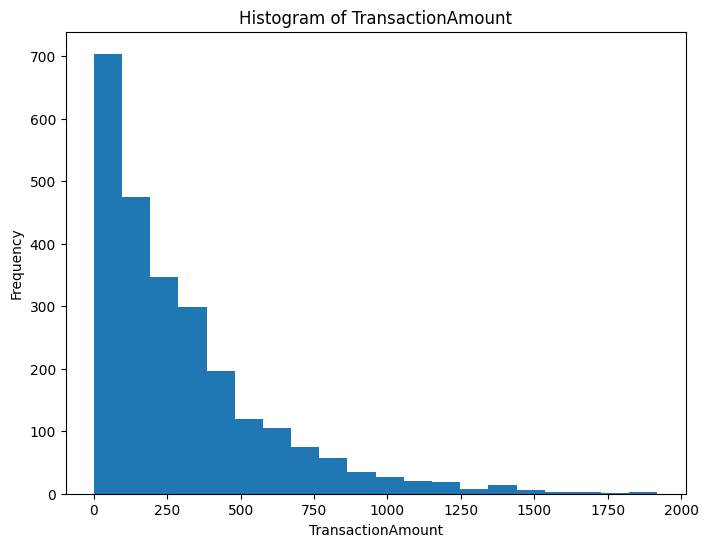

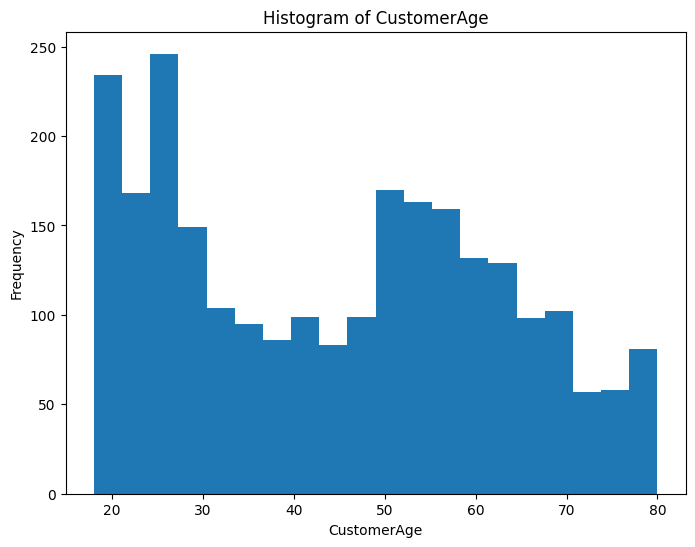

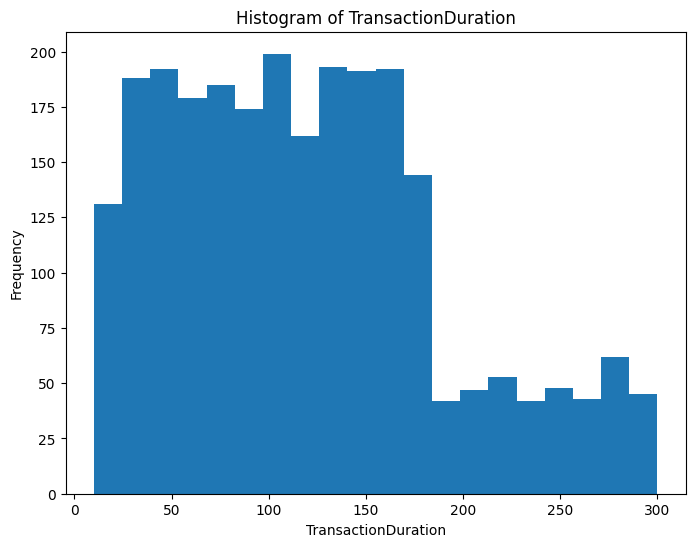

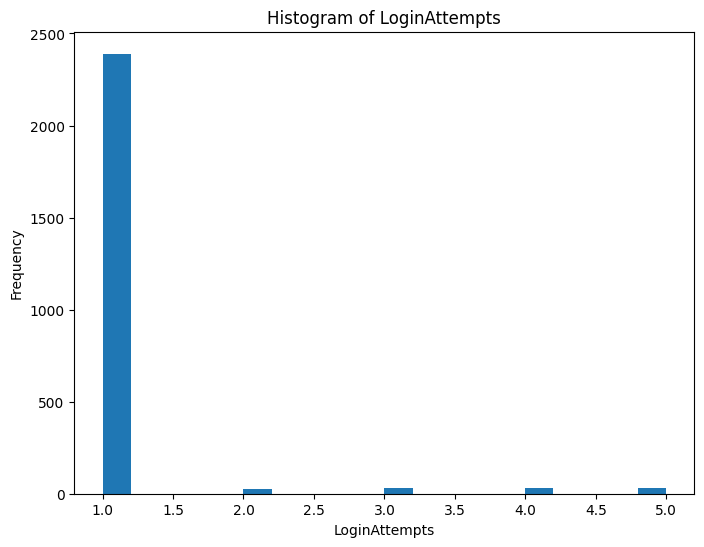

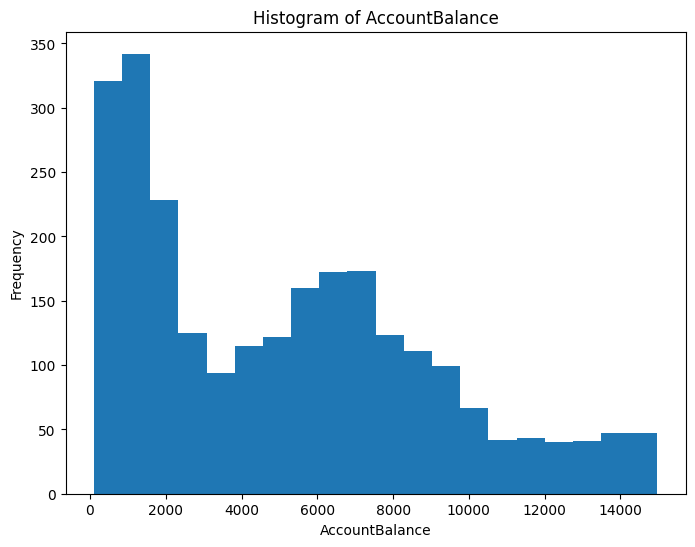

In [290]:
# Visualisasi histogram variabel numerik

numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

for feature in numeric_features:
    plt.figure(figsize=(8, 6))  # Mengatur ukuran figure
    plt.hist(df[feature], bins=20)  # Membuat histogram dengan 20 bins
    plt.title(f'Histogram of {feature}')  # Memberikan judul histogram
    plt.xlabel(feature)  # Memberikan label sumbu x
    plt.ylabel('Frequency')  # Memberikan label sumbu y
    plt.show()  # Menampilkan histogram

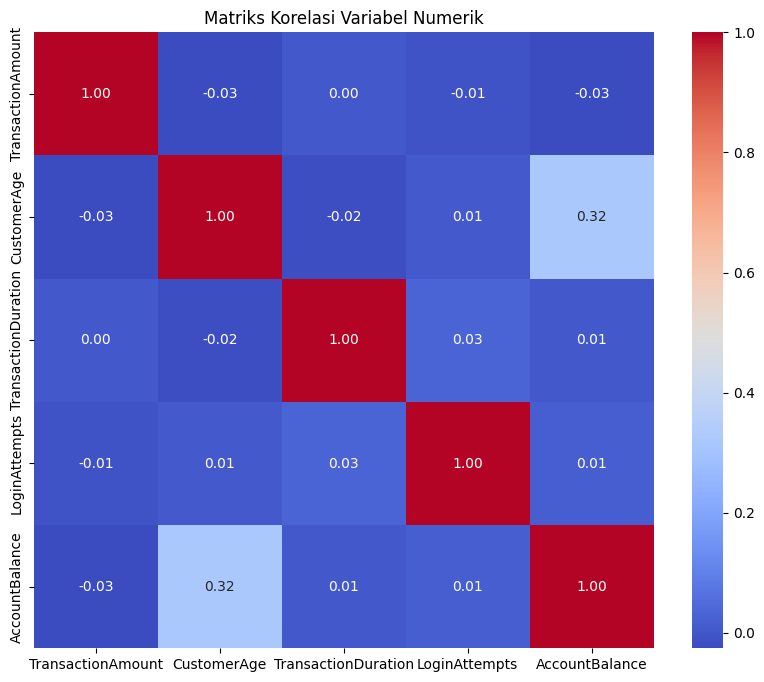

In [291]:
# Analisis Korelasi

# Hitung matriks korelasi
correlation_matrix = df[numeric_features].corr()

# Visualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

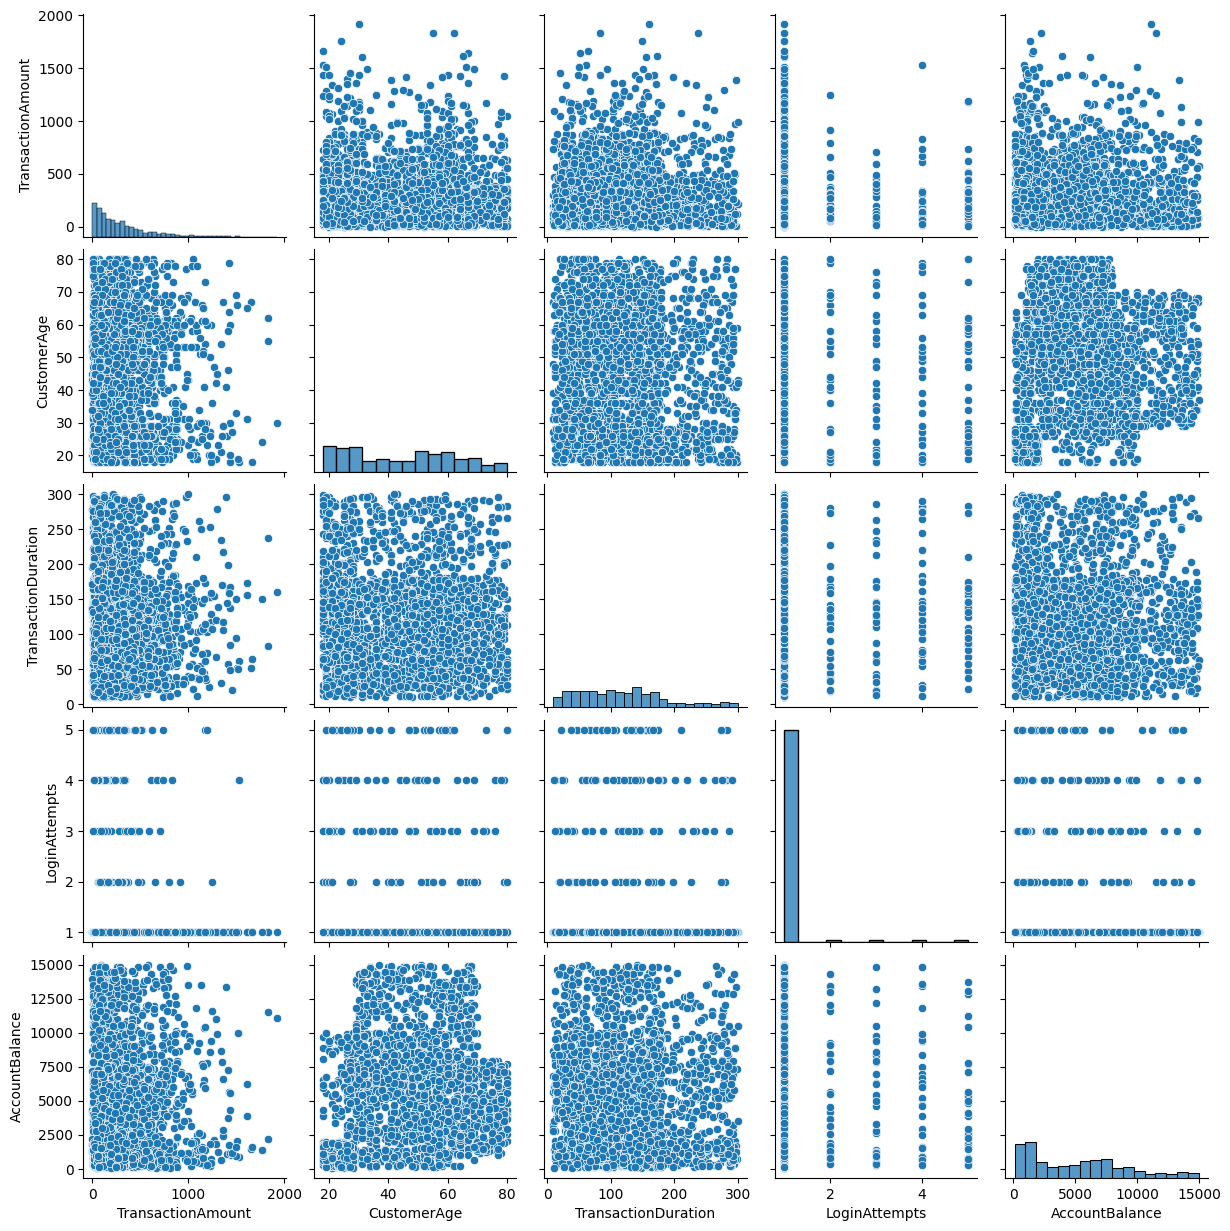

In [292]:
# Buat pairplot
sns.pairplot(df[numeric_features])
plt.show()

In [293]:
# Daftar variabel kategorikal
categorical_features = ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType',
                        'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel',
                        'CustomerOccupation', 'PreviousTransactionDate']

# Loop untuk menghitung dan menampilkan frekuensi kategori
for feature in categorical_features:
    print(f"\nFrekuensi Kategori untuk {feature}:")
    print(df[feature].value_counts())


Frekuensi Kategori untuk TransactionID:
TransactionID
TX002496    1
TX002495    1
TX002494    1
TX002493    1
TX002492    1
           ..
TX000005    1
TX000004    1
TX000003    1
TX000002    1
TX000001    1
Name: count, Length: 2512, dtype: int64

Frekuensi Kategori untuk AccountID:
AccountID
AC00460    12
AC00202    12
AC00362    12
AC00363    12
AC00480    11
           ..
AC00008     1
AC00472     1
AC00476     1
AC00038     1
AC00238     1
Name: count, Length: 495, dtype: int64

Frekuensi Kategori untuk TransactionDate:
TransactionDate
2023-04-03 16:07:53    1
2023-03-10 17:38:58    1
2023-03-17 16:10:35    1
2023-01-30 17:05:46    1
2023-04-03 16:05:30    1
                      ..
2023-10-16 17:51:24    1
2023-05-05 16:32:11    1
2023-07-10 18:16:08    1
2023-06-27 16:44:19    1
2023-04-11 16:29:14    1
Name: count, Length: 2512, dtype: int64

Frekuensi Kategori untuk TransactionType:
TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

Frekuensi Kategori un

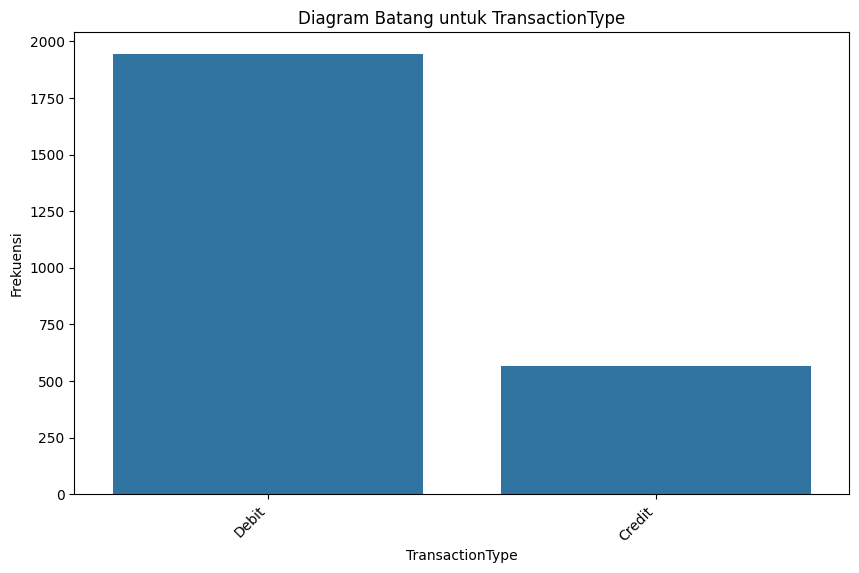

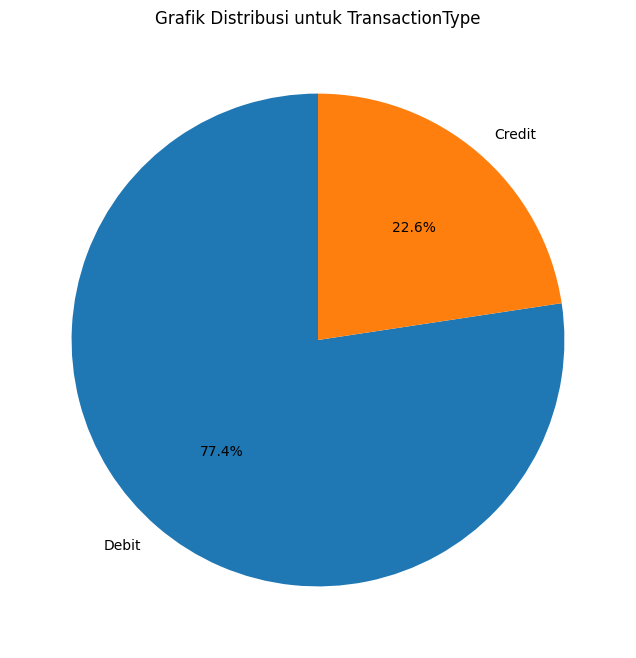

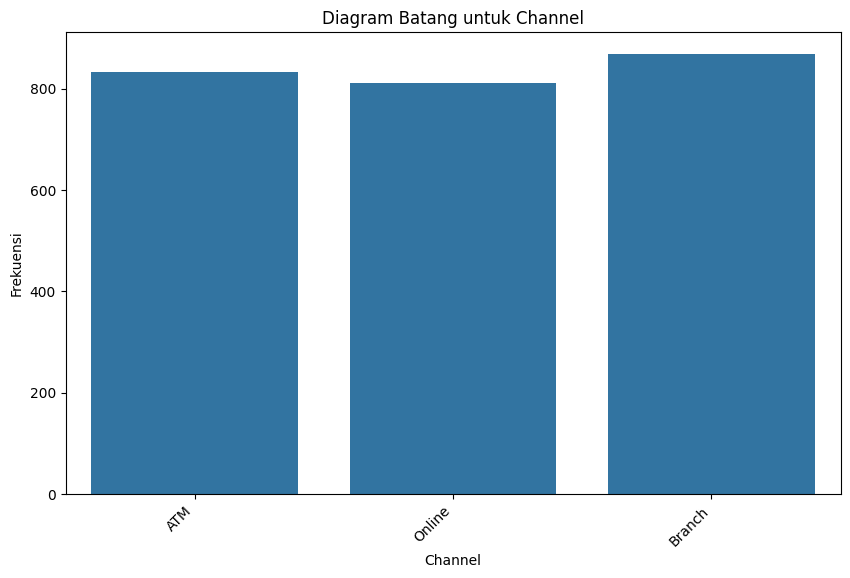

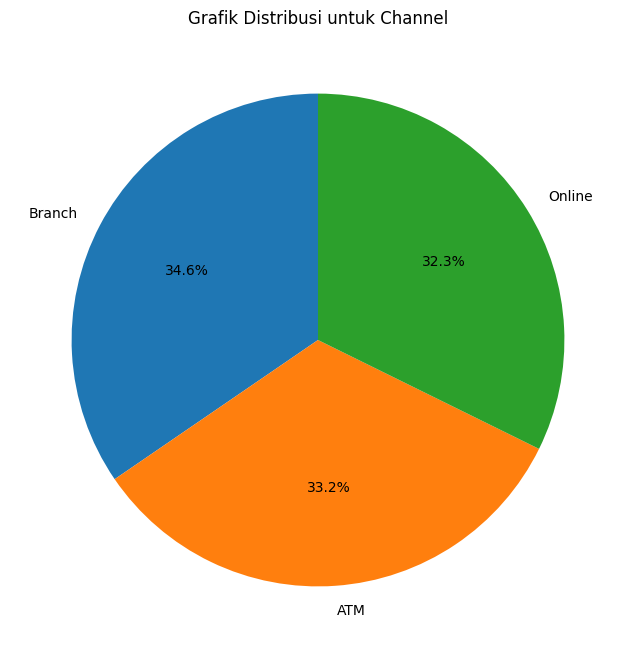

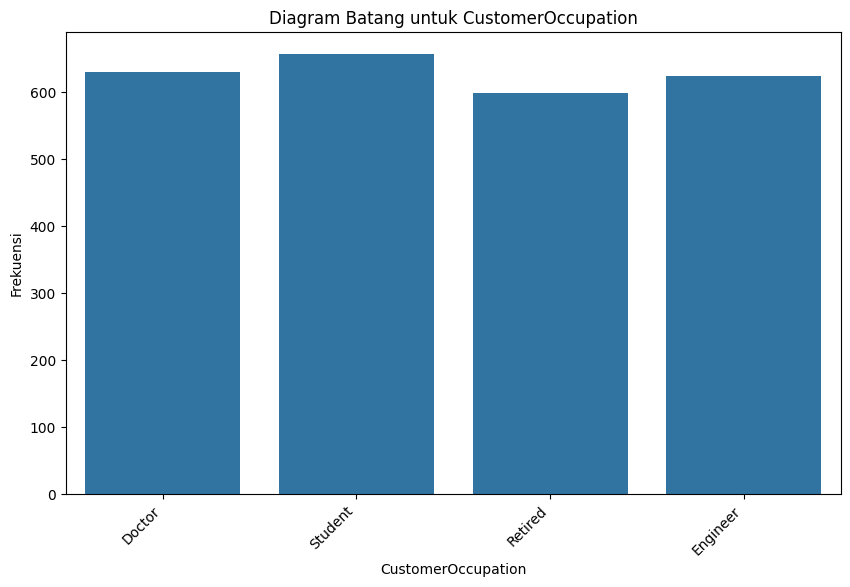

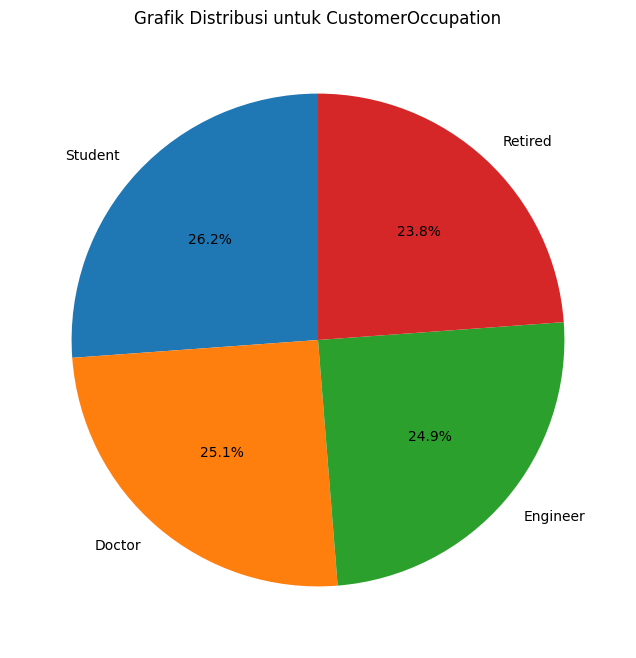

In [294]:
# Daftar variabel kategorikal
categorical_features = ['TransactionType','Channel','CustomerOccupation']

# Fungsi untuk membuat dan menampilkan diagram batang
def create_bar_chart(feature):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Diagram Batang untuk {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Fungsi untuk membuat dan menampilkan pie chart
def create_pie_chart(feature):
    category_counts = df[feature].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Grafik Distribusi untuk {feature}')
    plt.show()

# Loop untuk membuat visualisasi untuk setiap variabel kategorikal
for feature in categorical_features:
    create_bar_chart(feature)
    create_pie_chart(feature)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [295]:
# Pilih fitur numerik untuk normalisasi
numerical_features = ["TransactionAmount", "CustomerAge", "TransactionDuration", "AccountBalance"]
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_features] = scaler.fit_transform(df[numerical_features])

In [296]:
# One-Hot Encoding fitur kategorikal
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder

categorical_features = ["TransactionType",'Channel']
encoder = OneHotEncoder(drop="first", handle_unknown='ignore') # Remove 'sparse' and replace or ignore
encoded_cats = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_cats.toarray(), columns=encoder.get_feature_names_out(categorical_features)) # Convert to dense array

In [297]:
df_final = pd.concat([df_normalized[numerical_features], encoded_df], axis=1)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [298]:
from sklearn.cluster import KMeans

# Pilih fitur yang akan digunakan untuk clustering
# (Pastikan Anda telah melakukan preprocessing data seperti yang dijelaskan sebelumnya)
X = df_final # Data yang sudah di-encode

# Inisialisasi model KMeans dengan jumlah cluster yang diinginkan (misalnya, 3)
kmeans = KMeans(n_clusters=3, random_state=42) # random_state untuk konsistensi

# Latih model
kmeans.fit(X)

# Dapatkan label cluster untuk setiap data point
labels = kmeans.labels_

In [299]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3798171676336902


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

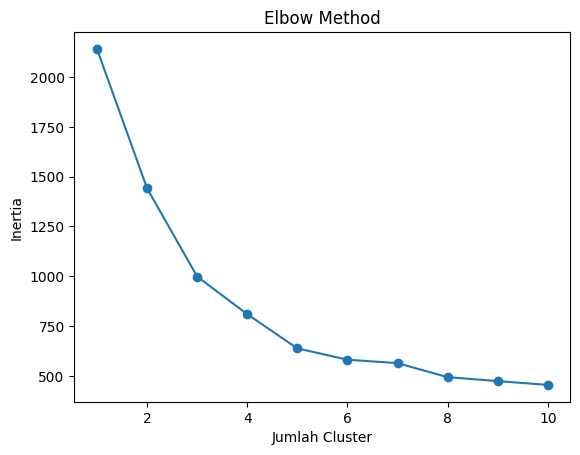

In [300]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):  # Uji jumlah cluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)  # X adalah data Anda yang telah di-preprocessing
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

In [301]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score untuk model dengan 3 cluster (misalnya)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3798171676336902


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [302]:
# Reduksi Dimensi dengan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

In [303]:
# Clustering dengan K-Means
optimal_clusters = 3 # Dari analisis sebelumnya
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_pca)

In [304]:
# Evaluasi silhouette score
silhouette = silhouette_score(df_pca, labels)
print(f"Optimal Cluster: {optimal_clusters}, Silhouette Score: {silhouette}")

Optimal Cluster: 3, Silhouette Score: 0.6770149891486817


In [305]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Mencoba jumlah cluster yang berbeda
silhouette_scores = []
for n_clusters in range(2, 11): # Misalnya, mencoba 2 hingga 10 cluster
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels))

# Menampilkan Silhouette Score untuk setiap jumlah cluster
for i, score in enumerate(silhouette_scores):
    print(f"Jumlah Cluster: {i+2}, Silhouette Score: {score}")

# Memilih jumlah cluster dengan Silhouette Score tertinggi
optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Jumlah Cluster Optimal: {optimal_clusters}")

# Melakukan clustering dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(df_pca)

Jumlah Cluster: 2, Silhouette Score: 0.5615316461621825
Jumlah Cluster: 3, Silhouette Score: 0.6770149891486817
Jumlah Cluster: 4, Silhouette Score: 0.8031654662611497
Jumlah Cluster: 5, Silhouette Score: 0.9332353603566884
Jumlah Cluster: 6, Silhouette Score: 0.9709915908878448
Jumlah Cluster: 7, Silhouette Score: 0.886339858830981
Jumlah Cluster: 8, Silhouette Score: 0.7945852000932212
Jumlah Cluster: 9, Silhouette Score: 0.6827800182812768
Jumlah Cluster: 10, Silhouette Score: 0.6450612528347865
Jumlah Cluster Optimal: 6


In [306]:
from sklearn.decomposition import PCA

# Mencoba jumlah komponen PCA yang berbeda
silhouette_scores = []
for n_components in range(2, 5): # Misalnya, mencoba 2 hingga 4 komponen
    pca = PCA(n_components=n_components)
    df_pca = pca.fit_transform(df_final)
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42) # optimal_clusters dari langkah sebelumnya
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels))

# Menampilkan Silhouette Score untuk setiap jumlah komponen
for i, score in enumerate(silhouette_scores):
    print(f"Jumlah Komponen PCA: {i+2}, Silhouette Score: {score}")

# ... (pilih n_components terbaik dan lakukan clustering final) ...

Jumlah Komponen PCA: 2, Silhouette Score: 0.9709915908878448
Jumlah Komponen PCA: 3, Silhouette Score: 0.6075089201345885
Jumlah Komponen PCA: 4, Silhouette Score: 0.6151535775712212


In [307]:
# Reduksi Dimensi dengan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

In [308]:
# Clustering dengan K-Means
optimal_clusters = 6 # Dari analisis sebelumnya
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_pca)

In [309]:
# Evaluasi silhouette score
silhouette = silhouette_score(df_pca, labels)
print(f"Optimal Cluster: {optimal_clusters}, Silhouette Score: {silhouette}")

Optimal Cluster: 6, Silhouette Score: 0.9709915908878448


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

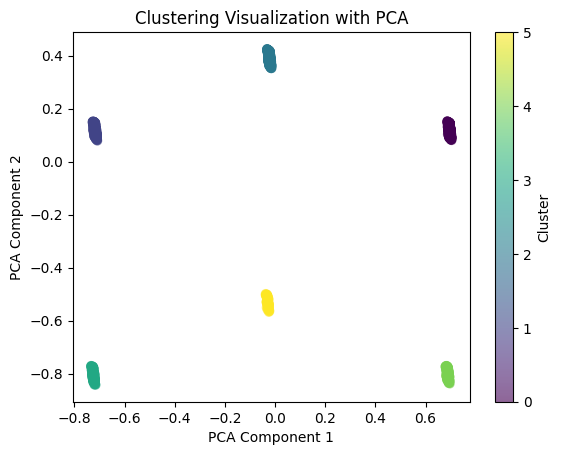

In [310]:
# Plot hasil PCA (2D)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [311]:
# hasil cluster
df_final['Cluster'] = labels

In [312]:
df_final

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online,Cluster
0,0.007207,0.838710,0.244828,0.336832,1.0,0.0,0.0,2
1,0.195940,0.806452,0.451724,0.918055,1.0,0.0,0.0,2
2,0.065680,0.016129,0.158621,0.068637,1.0,0.0,1.0,1
3,0.096016,0.129032,0.051724,0.569198,1.0,0.0,1.0,1
4,0.006874,0.129032,0.648276,0.492591,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...
2507,0.446074,0.241935,0.341379,0.846257,0.0,1.0,0.0,4
2508,0.130953,0.483871,0.575862,0.010318,1.0,1.0,0.0,0
2509,0.014785,0.612903,0.468966,0.220590,1.0,1.0,0.0,0
2510,0.096782,0.080645,0.031034,0.112636,1.0,0.0,1.0,1


In [313]:
# Simpan data ke drive

df_final.to_csv('/content/drive/MyDrive/dataset_noninverse.csv', index=False)

In [314]:
cluster_distribution = df_final['Cluster'].value_counts()
print(cluster_distribution)


Cluster
2    760
0    617
1    567
4    251
3    244
5     73
Name: count, dtype: int64


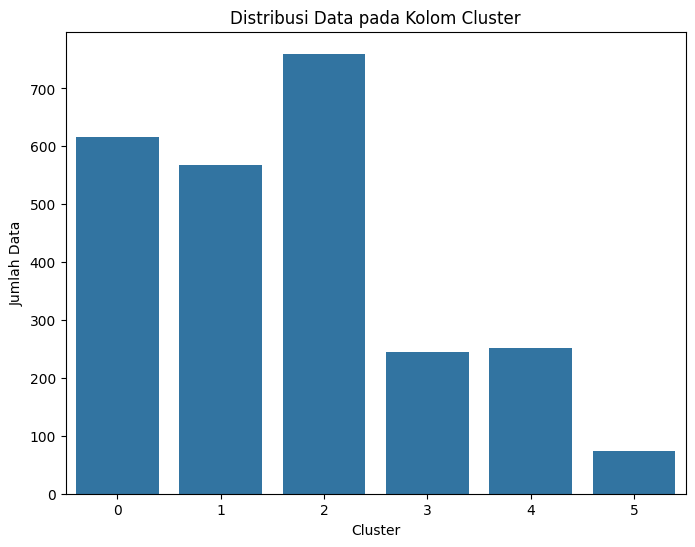

In [315]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_final)
plt.title('Distribusi Data pada Kolom Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

In [316]:
from sklearn.preprocessing import OneHotEncoder
# Pastikan kamu sudah memiliki encoder yang digunakan saat encoding
# onehot_encoder = OneHotEncoder(handle_unknown='ignore')  # Ini harus sama dengan sebelumnya
# Use the previously fitted encoder instead of creating a new one
onehot_encoder = encoder # This line is changed

# Inverse transform untuk mendapatkan kembali kategori asli
df_final[categorical_features] = onehot_encoder.inverse_transform(df_final[onehot_encoder.get_feature_names_out(categorical_features)])

# Salin hasil ke df_original
# df[categorical_features] = df_final[categorical_features]

In [317]:
df_final

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online,Cluster,TransactionType,Channel
0,0.007207,0.838710,0.244828,0.336832,1.0,0.0,0.0,2,Debit,ATM
1,0.195940,0.806452,0.451724,0.918055,1.0,0.0,0.0,2,Debit,ATM
2,0.065680,0.016129,0.158621,0.068637,1.0,0.0,1.0,1,Debit,Online
3,0.096016,0.129032,0.051724,0.569198,1.0,0.0,1.0,1,Debit,Online
4,0.006874,0.129032,0.648276,0.492591,0.0,0.0,1.0,3,Credit,Online
...,...,...,...,...,...,...,...,...,...,...
2507,0.446074,0.241935,0.341379,0.846257,0.0,1.0,0.0,4,Credit,Branch
2508,0.130953,0.483871,0.575862,0.010318,1.0,1.0,0.0,0,Debit,Branch
2509,0.014785,0.612903,0.468966,0.220590,1.0,1.0,0.0,0,Debit,Branch
2510,0.096782,0.080645,0.031034,0.112636,1.0,0.0,1.0,1,Debit,Online


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [318]:
# Pastikan kamu menggunakan scaler yang sama
# scaler = MinMaxScaler()  <-- Remove this line and replace with below

# Use the same scaler used in the previous section
# Assuming 'scaler' was the MinMaxScaler object used in step 5
scaler = df_final[numerical_features].agg(['min', 'max'])
scaler = MinMaxScaler()
scaler.fit(df[numerical_features])

# Inverse transform untuk semua fitur numerik
df_final[numerical_features] = scaler.inverse_transform(df_final[numerical_features])

# Simpan hasil ke df_original
# df[numerical_features] = df_final[numerical_features]

In [319]:
df_final

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online,Cluster,TransactionType,Channel
0,14.09,70.0,81.0,5112.21,1.0,0.0,0.0,2,Debit,ATM
1,376.24,68.0,141.0,13758.91,1.0,0.0,0.0,2,Debit,ATM
2,126.29,19.0,56.0,1122.35,1.0,0.0,1.0,1,Debit,Online
3,184.50,26.0,25.0,8569.06,1.0,0.0,1.0,1,Debit,Online
4,13.45,26.0,198.0,7429.40,0.0,0.0,1.0,3,Credit,Online
...,...,...,...,...,...,...,...,...,...,...
2507,856.21,33.0,109.0,12690.79,0.0,1.0,0.0,4,Credit,Branch
2508,251.54,48.0,177.0,254.75,1.0,1.0,0.0,0,Debit,Branch
2509,28.63,56.0,146.0,3382.91,1.0,1.0,0.0,0,Debit,Branch
2510,185.97,23.0,19.0,1776.91,1.0,0.0,1.0,1,Debit,Online


In [320]:
# Kolom yang akan dihapus
columns_to_remove = ['TransactionType_Debit','Channel_Branch',	'Channel_Online']

# Hapus kolom dari df_final
df_final = df_final.drop(columns=columns_to_remove, axis=1)

In [321]:
df_final

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster,TransactionType,Channel
0,14.09,70.0,81.0,5112.21,2,Debit,ATM
1,376.24,68.0,141.0,13758.91,2,Debit,ATM
2,126.29,19.0,56.0,1122.35,1,Debit,Online
3,184.50,26.0,25.0,8569.06,1,Debit,Online
4,13.45,26.0,198.0,7429.40,3,Credit,Online
...,...,...,...,...,...,...,...
2507,856.21,33.0,109.0,12690.79,4,Credit,Branch
2508,251.54,48.0,177.0,254.75,0,Debit,Branch
2509,28.63,56.0,146.0,3382.91,0,Debit,Branch
2510,185.97,23.0,19.0,1776.91,1,Debit,Online


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

<ipython-input-322-3dce7a939664>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="TransactionAmount", data=df_final, palette="Set2")


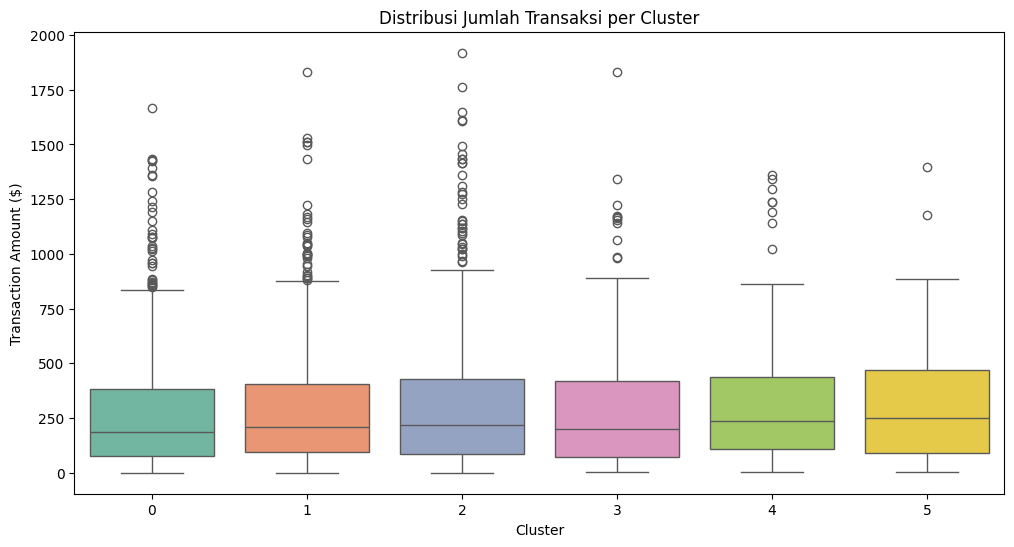

<ipython-input-322-3dce7a939664>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="CustomerAge", data=df_final, palette="Set2")


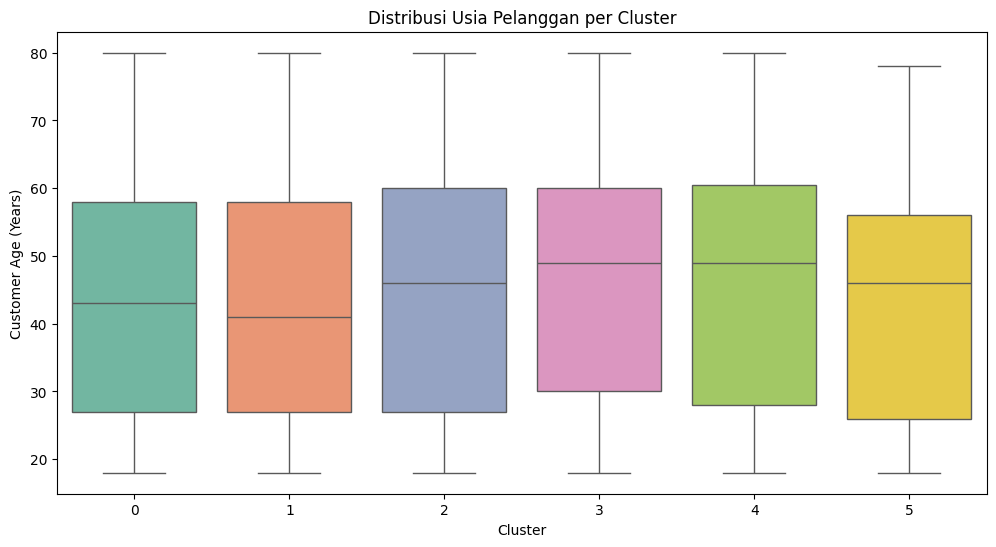

<ipython-input-322-3dce7a939664>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="AccountBalance", data=df_final, palette="Set2")


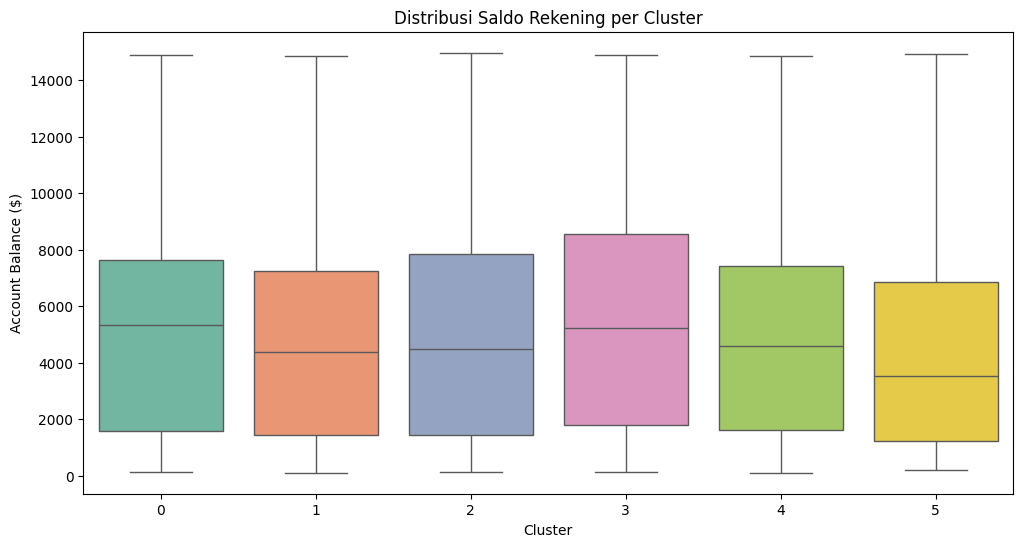

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran plot
plt.figure(figsize=(12, 6))

# Membuat plot distribusi jumlah transaksi per cluster
sns.boxplot(x="Cluster", y="TransactionAmount", data=df_final, palette="Set2")
plt.title("Distribusi Jumlah Transaksi per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Transaction Amount ($)")
plt.show()

# Membuat plot distribusi usia pelanggan per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cluster", y="CustomerAge", data=df_final, palette="Set2")
plt.title("Distribusi Usia Pelanggan per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Customer Age (Years)")
plt.show()

# Membuat plot distribusi saldo rekening per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cluster", y="AccountBalance", data=df_final, palette="Set2")
plt.title("Distribusi Saldo Rekening per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Account Balance ($)")
plt.show()


In [323]:
# Menghitung statistik ringkasan untuk setiap cluster
cluster_summary_new = df_final.groupby("Cluster")[["TransactionAmount", "CustomerAge", "TransactionDuration", "AccountBalance"]].describe()
cluster_summary_new

TransactionAmount                                                   \
                    count        mean         std   min       25%      50%   
Cluster                                                                      
0                   617.0  276.625413  278.976021  0.45   77.5300  186.550   
1                   567.0  298.895362  289.285336  0.26   93.1800  207.650   
2                   760.0  306.988750  305.057978  0.32   83.7475  217.900   
3                   244.0  293.309303  302.680909  3.42   71.8325  199.495   
4                   251.0  316.753466  278.211790  3.30  108.5800  237.990   
5                    73.0  315.342192  288.823260  2.03   90.9400  252.310   

                         CustomerAge             ... TransactionDuration  \
            75%      max       count       mean  ...                 75%   
Cluster                                          ...                       
0        383.37  1664.33       617.0  43.930308  ...              161.00   
1        407.23  1830.00       567.0  43.460317  ...              161.00   
2        427.12  1919.11       760.0  45.077632  ...              163.00   
3        419.12  1831.02       244.0  46.672131  ...              162.25   
4        436.24  1360.01       251.0  46.350598  ...              158.00   
5        469.13  1397.59        73.0  43.739726  ...              159.00   

               AccountBalance                                               \
           max          count         mean          std     min        25%   
Cluster                                                                      
0        298.0          617.0  5276.825656  3855.351402  117.98  1588.3100   
1        300.0          567.0  4850.068942  3800.717137  101.25  1452.2100   
2        300.0          760.0  5078.575658  3922.266539  112.76  1444.5675   
3        294.0          244.0  5701.467377  4104.563456  125.85  1803.1850   
4        293.0          251.0  5018.968725  3886.393160  105.01  1630.6250   
5        282.0           73.0  4530.162192  4020.587912  185.87  1241.9900   

                                        
              50%        75%       max  
Cluster                                 
0        5327.030  7643.6600  14904.90  
1        4384.950  7230.2500  14852.42  
2        4473.135  7834.7275  14977.99  
3        5242.320  8556.4050  14881.77  
4        4574.430  7422.6650  14847.97  
5        3528.720  6863.0200  14935.50  

[6 rows x 32 columns]

In [324]:
# Menghitung distribusi kategori dalam setiap cluster
categorical_features = ["TransactionType", "Channel"]
categorical_distribution = {}

for feature in categorical_features:
    categorical_distribution[feature] = df_final.groupby("Cluster")[feature].value_counts(normalize=True)

categorical_distribution

{'TransactionType': Cluster  TransactionType
 0        Debit              1.0
 1        Debit              1.0
 2        Debit              1.0
 3        Credit             1.0
 4        Credit             1.0
 5        Credit             1.0
 Name: proportion, dtype: float64,
 'Channel': Cluster  Channel
 0        Branch     1.0
 1        Online     1.0
 2        ATM        1.0
 3        Online     1.0
 4        Branch     1.0
 5        ATM        1.0
 Name: proportion, dtype: float64}

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0

- Rata-rata transaksi: $276.63

- Rata-rata usia pelanggan: 43.93 tahun

- Rata-rata saldo rekening: $5,276.83

- Jenis transaksi dominan: Debit

- Saluran transaksi dominan: Branch (cabang bank)
- Analisis: Pelanggan dalam cluster ini berada di usia paruh baya dengan saldo rekening sedang. Mereka lebih sering menggunakan transaksi debit dan cenderung datang langsung ke cabang bank untuk bertransaksi.

## Cluster 1:
- Rata-rata transaksi: $298.89

- Rata-rata usia pelanggan: 43.46 tahun

- Rata-rata saldo rekening: $4,850.07

- Jenis transaksi dominan: Debit

- Saluran transaksi dominan: Online
- Analisis: Pelanggan di cluster ini lebih tua dibandingkan cluster lain, dengan saldo yang lebih besar. Mereka lebih suka melakukan transaksi debit secara online.


## Cluster 2

- Rata-rata transaksi: $306.99

- Rata-rata usia pelanggan: 45.08 tahun

- Rata-rata saldo rekening: $5,078.58

- Jenis transaksi dominan: Debit

- Saluran transaksi dominan: ATM
- Analisis: Pelanggan dalam cluster ini cenderung melakukan transaksi dalam jumlah besar melalui ATM dan mayoritas menggunakan debit.

##Cluster 3

- Rata-rata transaksi: $293.309

- Rata-rata usia pelanggan: 46.67 tahun

- Rata-rata saldo rekening: $5,701.968

- Jenis transaksi dominan: Credit

- Saluran transaksi dominan: Online
- Analisis: Cluster ini terdiri dari pelanggan yang lebih sering melakukan transaksi kredit dan mereka cenderung menggunakan layanan online.

## Cluster 4

- Rata-rata transaksi: $316.753

- Rata-rata usia pelanggan: 46.35 tahun

- Rata-rata saldo rekening: $5,018.97

- Jenis transaksi dominan: Credit

- Saluran transaksi dominan: Branch (cabang bank)
- Analisis: Cluster ini berisi pelanggan yang lebih sering melakukan transaksi kredit dan langsung di cabang bank.

## Cluster 5

- Rata-rata transaksi: $315.34

- Rata-rata usia pelanggan: 43.74 tahun

- Rata-rata saldo rekening: $4,530.16

- Jenis transaksi dominan: Credit

- Saluran transaksi dominan: ATM
- Analisis: Cluster ini berisi pelanggan muda dengan saldo rekening yang lebih kecil dibandingkan cluster lain. Mereka lebih sering melakukan transaksi credit dan ke ATM



**Interpretasi dan Kesimpulan**

1. Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis?

- Clustering terlihat membagi pelanggan berdasarkan perilaku transaksi mereka, baik dari segi jumlah transaksi, usia, maupun saldo rekening.

- Jika clustering telah membentuk kelompok yang berbeda secara jelas, maka hasilnya sudah cukup baik dan dapat digunakan untuk analisis lebih lanjut.

2. Apakah ada pola tertentu yang bisa dimanfaatkan?

- Pelanggan muda dengan saldo kecil cenderung memiliki pola transaksi tertentu (misalnya, transaksi kecil tetapi sering menggunakan debit dan online banking).

- Pelanggan dengan saldo besar mungkin memiliki transaksi dalam jumlah lebih tinggi dan lebih sering melakukan transaksi di cabang bank atau menggunakan layanan premium.

- Cluster pelanggan tertentu yang memiliki pola unik bisa menjadi target untuk strategi pemasaran, penawaran produk, atau layanan yang lebih sesuai.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [325]:
# Simpan data ke drive
df_final.to_csv('/content/drive/MyDrive/final_dataset.csv', index=False)
